# Bike Sharing Assignment
    Nikhil N Barigidad
<hr style="border:0.2px solid gray"> </hr>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

**Business Goal:**\
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [581]:
#importing necessary librari
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the data

In [582]:
bikeSharing = pd.read_csv('day.csv')
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [583]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [584]:
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning
#### Checking for null values

In [585]:
#Checking for null values
bikeSharing.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no `null` values present in the dataframe

#### Duplicate values check

In [586]:
bikeSharing_dupCheck = bikeSharing.copy()
bikeSharing_dupCheck.drop_duplicates(subset=None, inplace=True)
bikeSharing_dupCheck.shape

(730, 16)

There are `No Duplicates` present in the dataframe

#### Dropping unwanted columns from dataframe

After closer study of the data dictionary and the data in dataframe, 
1. `instant` is just index of rows
2. `dteday` column has date, Since yr, mnth already has the values, this columns seems to be redundant
3. `casual & registered`, these columns have counts of bikes booked by casual and registered customers, SInce we have to predict the total cnt, and we already have column for the same, we will drop these two

*Note: New dataframe bikesharing_cleaned will have cleaned final data*

In [587]:
bikeSharing_cleaned = bikeSharing.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [588]:
bikeSharing_cleaned.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [589]:
#Converting variables type to categorical
bikeSharing_cleaned[['season', 'yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']] = bikeSharing_cleaned[['season', 'yr', 'mnth', 'holiday', 'workingday','weekday', 'weathersit']].astype("category")

### Visualising the Data

In [590]:
import matplotlib.pyplot as plt
import seaborn as sns

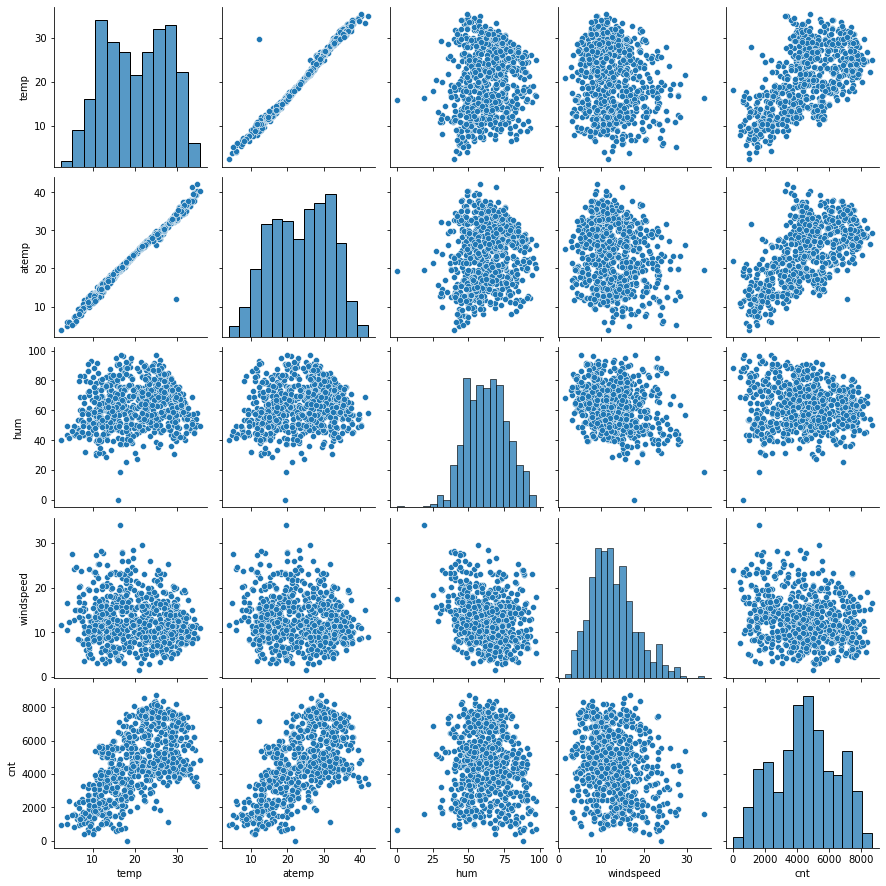

In [591]:
#pairplot for numeric variables
sns.pairplot(bikeSharing_cleaned)
plt.show()

Above pair plots tells us that there is `Linear Relation` between temp, atemp and cnt

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

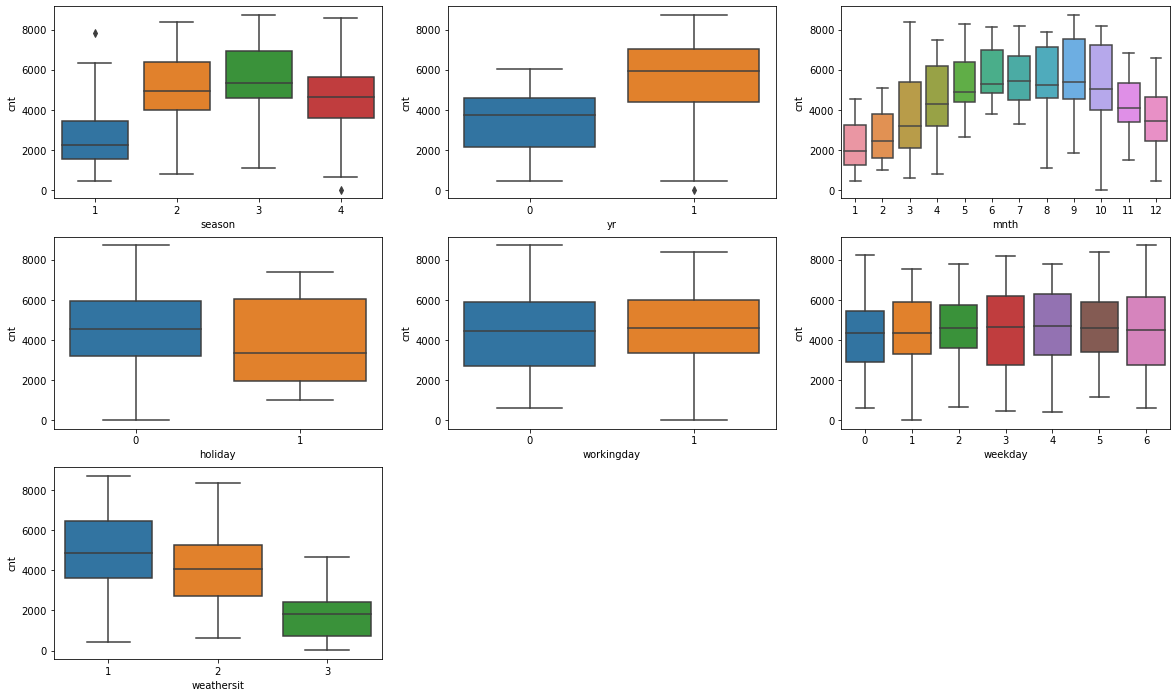

In [592]:
#Boxplot for categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikeSharing_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bikeSharing_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bikeSharing_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bikeSharing_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='workingday', y='cnt', data=bikeSharing_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='weekday', y='cnt', data=bikeSharing_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bikeSharing_cleaned)

There are 7 categorical variables in dataset.

Boxplots aboves shows us effect of these categorical variables on cnt
* **Season**: Most bookings are done in season 3 with median of more than 5000, followed by season 2, 3 and 4
* **yr**: Bookings have been increased drastically over years (>45%)
* **mnth**: Bookings are increasing from month 1 to 6, but then from 7 to 12 they tend to decrease
* **holiday**: Bookings are more in when there is no holiday, the distribution is as biased as almost 97.6% of bikes were booked when there is no holiday
* **workingday**: Most bikes were booked on working day
* **weekday**: Trend between all weekdays is very close, So this I think won't be influencing much in prediction
* **weathersit**: As we can see weathersit 1 have highest cnt, During weathersit 1, 67% of the bikes were booked, followed by weathersit 2 with only 30% bikes booked.

### Data Preperation

#### Creating Dummy variables for categorical variables

* `Season`: Season has values 1,2,3,4 => season_1, season_2, season_3 dummy variables can be created
* `yr`: No need of dummy variable
* `mnth`: mnth has values from 1-12 => 11 dummy varibales has to be created
* `holiday`: No dummy variable required
* `workingday` : No dummy varibale required
* `weekday`: weekday has 7 values => 6 dummy variables required
* `weathersit`: weathersit has 3 values => 2 dummy varibles required

In [593]:
#creating dummy variable for categorical variables
#season_1 as 1 and season_2 and season 3 as 0 corresponds value 1 in season
#season_2 as 1 and season_1 and season 3 as 0 corresponds value 2 in season
#season_3 as 1 and season_1 and season 2 as 0 corresponds value 3 in season
#season_1, season_2 and season 2 as 0 corresponds value 4 in season

#all other categorical will follow same convention

bikeSharing_cleaned = pd.get_dummies(bikeSharing_cleaned, drop_first=True)
bikeSharing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   atemp         730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   cnt           730 non-null    int64  
 5   season_2      730 non-null    uint8  
 6   season_3      730 non-null    uint8  
 7   season_4      730 non-null    uint8  
 8   yr_1          730 non-null    uint8  
 9   mnth_2        730 non-null    uint8  
 10  mnth_3        730 non-null    uint8  
 11  mnth_4        730 non-null    uint8  
 12  mnth_5        730 non-null    uint8  
 13  mnth_6        730 non-null    uint8  
 14  mnth_7        730 non-null    uint8  
 15  mnth_8        730 non-null    uint8  
 16  mnth_9        730 non-null    uint8  
 17  mnth_10       730 non-null    uint8  
 18  mnth_11       730 non-null    

#### Splitting Data into TEST and TRAIN set

In [594]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
#for train test split of 70% and 30%, shape of train is coming out as 510 and test as 219, thus missing one record, 
#By slightly modifying the percentage, we get correct split
bikeShare_train, bikeShare_test = train_test_split(bikeSharing_cleaned, train_size=0.701, test_size=0.299, random_state = 100)

In [595]:
print(bikeShare_train.shape)
print(bikeShare_test.shape)

(511, 30)
(219, 30)


#### Rescaling of the features

In [596]:
#importing MinMaxScaler for rescaling
from sklearn.preprocessing import MinMaxScaler

In [597]:
bikeShare_train.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [598]:
#using min-max scaling to avoid distortion of values
scaler = MinMaxScaler()

num_vars = ['season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2', 
        'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 
        'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 
        'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 
        'workingday_1', 'weathersit_2', 'weathersit_3']
bikeShare_train[num_vars] = scaler.fit_transform(bikeShare_train[num_vars])

In [599]:
bikeShare_train.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
653,19.201653,23.0423,55.8333,12.208807,7534,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,29.246653,33.1448,70.4167,11.083475,7216,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426,16.980847,20.6746,62.1250,10.792293,4066,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
728,10.489153,11.5850,48.3333,23.500518,1796,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,15.443347,18.8752,48.9583,8.708325,4220,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [600]:
bikeShare_train.describe()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,20.106483,23.499390,63.109443,12.833686,4491.303327,0.246575,0.262231,0.248532,0.508806,0.066536,...,0.025440,0.150685,0.133072,0.158513,0.133072,0.127202,0.154599,0.677104,0.344423,0.029354
std,7.424445,8.083052,14.142965,5.286912,1953.413860,0.431440,0.440279,0.432585,0.500412,0.249461,...,0.157613,0.358092,0.339986,0.365579,0.339986,0.333525,0.361876,0.468042,0.475645,0.168963
min,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.649576,16.634475,52.291650,9.041918,3123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.260847,24.115200,63.416700,12.124789,4539.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,26.615847,30.177700,73.208350,15.750595,6008.500000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


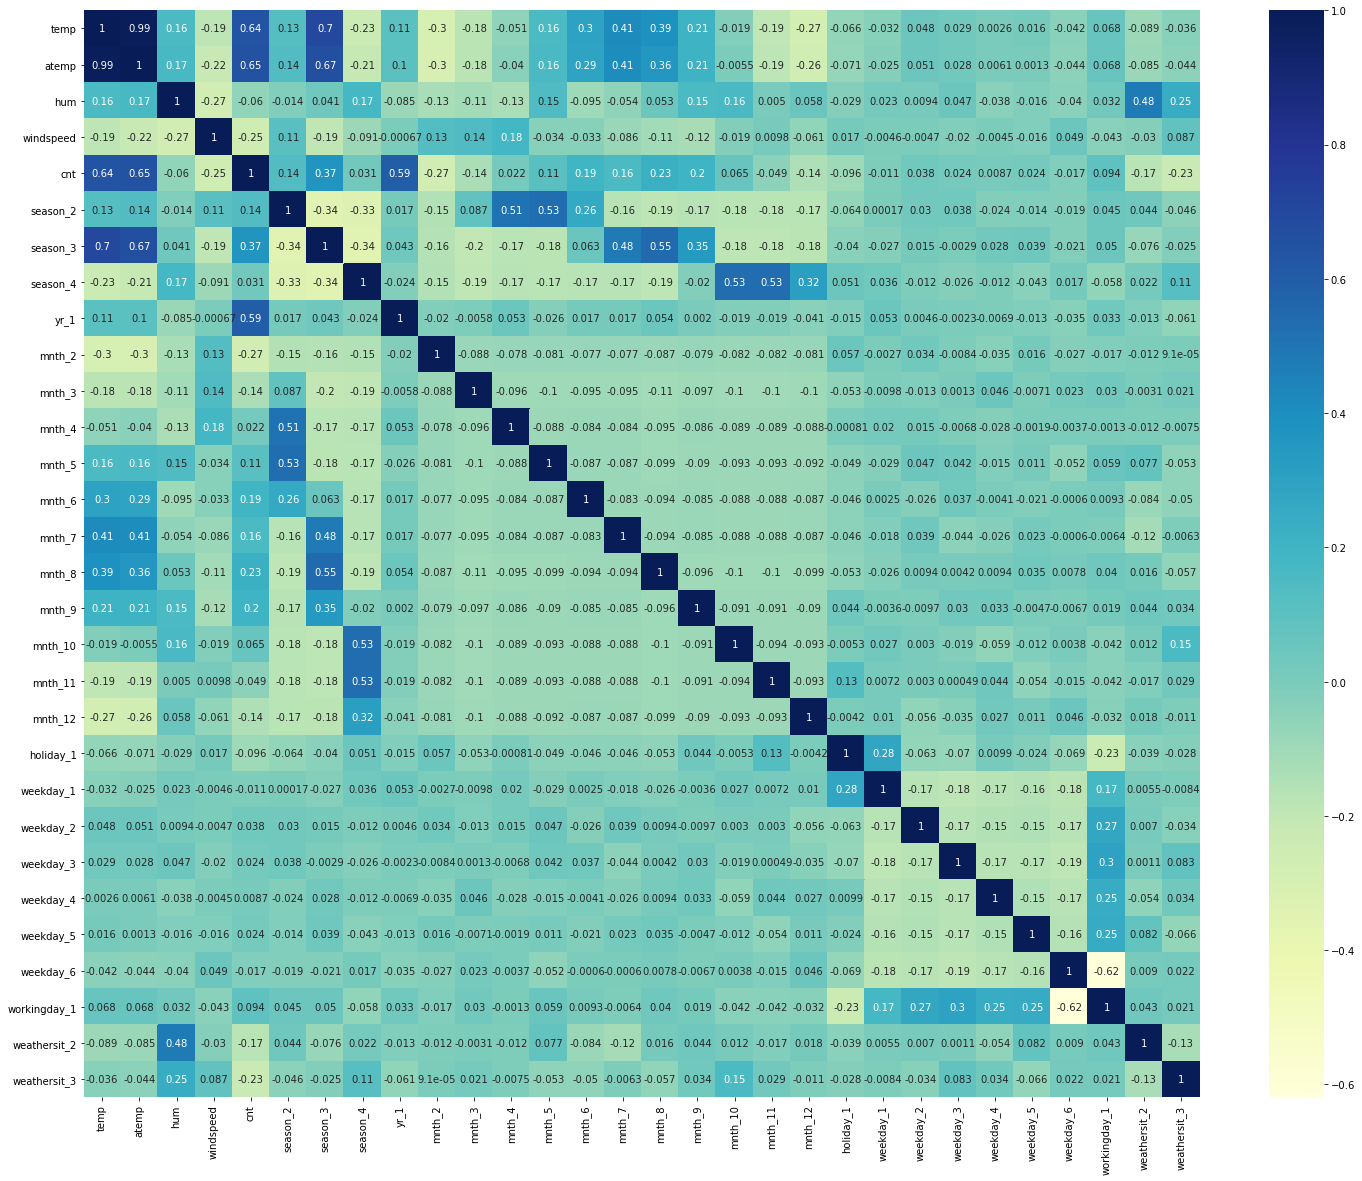

In [601]:
#Correlation between the variables
plt.figure(figsize=(25,20))
sns.heatmap(bikeShare_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

Top 5 Variables that are highly correlated with `cnt` are:
 * Temp
 * atemp
 * yr_1
 * season_3
 * mnth_2(Negatively correlated)

#### Divide X_train and y_train

In [602]:
y_train = bikeShare_train.pop('cnt')
X_train = bikeShare_train

### Building model

Since we have less than `30 columns` in our dataset, I think it is better to use `Manual Feature selection approach` to select best affecting features for this model

#### Model 1

In [603]:
import statsmodels.api as sm

#adding constant to regression
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const           1398.488534
temp             102.009807
atemp             13.718715
hum              -13.708721
windspeed        -51.256890
season_2         763.497926
season_3         395.058092
season_4        1324.358317
yr_1            2025.117727
mnth_2           266.323811
mnth_3           562.057400
mnth_4           547.525713
mnth_5           771.772614
mnth_6           602.320185
mnth_7           266.069274
mnth_8           744.183288
mnth_9          1305.522296
mnth_10          640.715688
mnth_11          203.485202
mnth_12          165.406750
holiday_1       -358.801449
weekday_1        -90.001523
weekday_2        -47.383362
weekday_3         47.989853
weekday_4         14.767393
weekday_5         99.008973
weekday_6        472.232880
workingday_1     383.182782
weathersit_2    -519.674102
weathersit_3   -2221.569061
dtype: float64

In [604]:
#summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.76
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          7.47e-181
Time:                        08:41:24   Log-Likelihood:                -4107.0
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     482   BIC:                             8395.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1398.4885    283.706      4.929   

Looking at the p values, we can see some of the variables are not significant. 
Checking `VIF` values of the variables will be a good supplimentary information with the above p values to get rid off of the variables

In [605]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [606]:
#Getting VIF for variables
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X_train.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
26,workingday_1,inf
24,weekday_5,inf
23,weekday_4,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
19,holiday_1,inf
0,temp,551.24
1,atemp,512.31
2,hum,24.50


#### Recursively drop variables which are contributing least to the model

VIF for some of the variable is very high, But for `weekday_4`, p-value is 0.877 thus dropping it.

In [607]:
#weekday_4 has p value of 0.877 which is very high.. thus dropping value
X = X_train.drop('weekday_4', 1)

#### Model 2

In [608]:
#Build model again after dropping weekday_4
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [609]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.76
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          7.47e-181
Time:                        08:41:24   Log-Likelihood:                -4107.0
No. Observations:                 511   AIC:                             8272.
Df Residuals:                     482   BIC:                             8395.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1398.4885    283.706      4.929   

In [610]:
# Calculate VIF for the new model again
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,551.24
1,atemp,512.31
2,hum,24.50
5,season_3,15.37
14,mnth_8,10.94
6,season_4,10.91
13,mnth_7,9.58
25,workingday_1,9.47
4,season_2,8.95
12,mnth_6,7.50


After dropping `weekday_4`, VIF value for variables have become finite

As we can see for variable `atemp` both p-value (`0.664`) and VIF (`512.31`) are significantly high so let's drop it

In [611]:
X = X.drop('atemp',1)

#### Model 3

In [612]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [613]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          7.98e-182
Time:                        08:41:24   Log-Likelihood:                -4107.1
No. Observations:                 511   AIC:                             8270.
Df Residuals:                     483   BIC:                             8389.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1421.2818    278.569      5.102   

In [614]:
# Calculate VIF for the new model again
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,56.95
1,hum,23.44
4,season_3,15.35
5,season_4,10.91
13,mnth_8,10.84
12,mnth_7,9.55
24,workingday_1,9.43
3,season_2,8.95
11,mnth_6,7.47
14,mnth_9,7.29


For value `weekday_3` p-value (`0.805`) is significantly high, thus dropping this variable

In [615]:
X = X.drop('weekday_3', 1)

#### Model 4

In [616]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [617]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.8
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          7.84e-183
Time:                        08:41:24   Log-Likelihood:                -4107.1
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     484   BIC:                             8383.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1419.7394    278.228      5.103   

In [618]:
# Calculate VIF for the new model again
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,56.93
1,hum,23.43
4,season_3,15.33
5,season_4,10.91
13,mnth_8,10.83
12,mnth_7,9.55
3,season_2,8.94
11,mnth_6,7.46
14,mnth_9,7.28
10,mnth_5,7.17


For value `weekday_5` p-value (`0.594`) is significantly high, thus dropping this variable

In [619]:
X = X.drop('weekday_5',1)

#### Model 5

In [620]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [621]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.3
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          8.42e-184
Time:                        08:41:24   Log-Likelihood:                -4107.3
No. Observations:                 511   AIC:                             8267.
Df Residuals:                     485   BIC:                             8377.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1423.1203    277.951      5.120   

In [622]:
# Calculate VIF for the new model again
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,56.93
1,hum,23.42
4,season_3,15.33
5,season_4,10.91
13,mnth_8,10.83
12,mnth_7,9.54
3,season_2,8.94
11,mnth_6,7.46
14,mnth_9,7.28
10,mnth_5,7.17


For value `mnth_7` p-value (`0.481`) and VIF (`9.54`) are significantly high, thus dropping this variable

In [623]:
X = X.drop('mnth_7',1)

#### Model 6

In [624]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [625]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          9.81e-185
Time:                        08:41:25   Log-Likelihood:                -4107.5
No. Observations:                 511   AIC:                             8265.
Df Residuals:                     486   BIC:                             8371.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1422.3411    277.803      5.120   

In [626]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,36.78
1,hum,22.64
4,season_3,9.91
5,season_4,9.88
3,season_2,7.63
2,windspeed,6.36
21,workingday_1,5.84
15,mnth_11,4.46
14,mnth_10,4.40
10,mnth_5,3.89


For value `mnth_11` p-value (`0.684`) is significantly high, thus dropping this variable

In [627]:
X = X.drop('mnth_11', 1)

#### Model 7

In [628]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [629]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          9.52e-186
Time:                        08:41:25   Log-Likelihood:                -4107.6
No. Observations:                 511   AIC:                             8263.
Df Residuals:                     487   BIC:                             8365.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1432.9222    276.349      5.185   

In [630]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,36.23
1,hum,22.00
4,season_3,9.81
3,season_2,7.62
2,windspeed,6.14
20,workingday_1,5.83
5,season_4,4.07
10,mnth_5,3.86
9,mnth_4,3.43
11,mnth_6,2.57


For value `mnth_12` p-value (`0.819`) is significantly high, thus dropping this variable

In [631]:
X = X.drop('mnth_12',1)

#### Model 8

In [632]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [633]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          8.52e-187
Time:                        08:41:25   Log-Likelihood:                -4107.6
No. Observations:                 511   AIC:                             8261.
Df Residuals:                     488   BIC:                             8359.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1438.7637    274.901      5.234   

In [634]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,35.96
1,hum,20.98
4,season_3,9.81
3,season_2,7.61
2,windspeed,6.13
19,workingday_1,5.81
5,season_4,3.89
10,mnth_5,3.84
9,mnth_4,3.42
11,mnth_6,2.56


p-value for `weekday_2` is 0.355, which is higher than the threshold value, thus dropping it

In [635]:
X = X.drop('weekday_2', 1)

#### Model 9

In [636]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [637]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.3
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          1.11e-187
Time:                        08:41:25   Log-Likelihood:                -4108.1
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     489   BIC:                             8353.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1450.6521    274.560      5.284   

In [638]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,35.96
1,hum,20.98
4,season_3,9.80
3,season_2,7.61
2,windspeed,6.13
18,workingday_1,5.44
5,season_4,3.89
10,mnth_5,3.84
9,mnth_4,3.42
11,mnth_6,2.56


p-value for `weekday_1` is 0.175, which is higher than the threshold value, thus dropping it

In [639]:
X = X.drop('weekday_1', 1)

#### Model 10

In [640]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [641]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          1.78e-188
Time:                        08:41:25   Log-Likelihood:                -4108.8
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     490   BIC:                             8349.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1458.9872    274.553      5.314   

In [642]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,35.82
1,hum,20.94
4,season_3,9.79
3,season_2,7.60
2,windspeed,6.13
17,workingday_1,5.21
5,season_4,3.89
10,mnth_5,3.84
9,mnth_4,3.42
11,mnth_6,2.56


p-value for `mnth_2` is 0.21, which is higher than the threshold value, thus dropping it

In [643]:
X = X.drop('mnth_2',1)

#### Model 11

In [644]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [645]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          3.14e-189
Time:                        08:41:25   Log-Likelihood:                -4109.6
No. Observations:                 511   AIC:                             8259.
Df Residuals:                     491   BIC:                             8344.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1534.4917    268.029      5.725   

In [646]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,35.47
1,hum,20.56
4,season_3,8.99
3,season_2,7.46
2,windspeed,5.85
16,workingday_1,5.19
9,mnth_5,3.73
8,mnth_4,3.34
5,season_4,3.26
10,mnth_6,2.51


p-value for `mnth_4` is 0.104, which is higher than the threshold value, thus dropping it

In [647]:
X = X.drop('mnth_4',1)

#### Model 12

In [648]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [649]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.5
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          9.21e-190
Time:                        08:41:25   Log-Likelihood:                -4111.0
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     492   BIC:                             8340.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1561.1861    267.973      5.826   

In [650]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,35.12
1,hum,20.49
4,season_3,8.98
2,windspeed,5.74
15,workingday_1,5.19
3,season_2,3.81
5,season_4,3.21
16,weathersit_2,2.19
6,yr_1,2.08
8,mnth_5,1.98


p-value for `mnth_6` is 0.260, which is higher than the threshold value, thus dropping it

In [651]:
X = X.drop('mnth_6', 1)

#### Model 13

In [652]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [653]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          1.33e-190
Time:                        08:41:25   Log-Likelihood:                -4111.6
No. Observations:                 511   AIC:                             8259.
Df Residuals:                     493   BIC:                             8336.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1549.4833    267.845      5.785   

In [654]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,30.12
1,hum,19.97
4,season_3,8.77
2,windspeed,5.65
14,workingday_1,5.18
3,season_2,3.75
5,season_4,3.15
15,weathersit_2,2.19
6,yr_1,2.07
13,weekday_6,1.94


p-value for `mnth_5` is 0.11, which is higher than the threshold value, thus dropping it

In [655]:
X = X.drop('mnth_5', 1)

#### Model 14

In [656]:
#Build model again after dropping atemp
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [657]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          3.53e-191
Time:                        08:41:25   Log-Likelihood:                -4113.0
No. Observations:                 511   AIC:                             8260.
Df Residuals:                     494   BIC:                             8332.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1499.1028    266.409      5.627   

In [658]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,29.42
1,hum,19.89
4,season_3,8.51
2,windspeed,5.54
13,workingday_1,5.18
3,season_2,3.52
5,season_4,3.09
14,weathersit_2,2.19
6,yr_1,2.06
12,weekday_6,1.94


p-value for `season_3` is 0.096, which is higher than the threshold value, thus dropping it

In [659]:
X = X.drop('season_3',1)

#### Model 15

In [660]:
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [661]:
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.8
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          1.02e-191
Time:                        08:41:25   Log-Likelihood:                -4114.4
No. Observations:                 511   AIC:                             8261.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1480.0189    266.644      5.551   

In [662]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
1,hum,18.66
0,temp,12.38
2,windspeed,5.44
12,workingday_1,5.18
4,season_4,2.35
13,weathersit_2,2.17
5,yr_1,2.04
11,weekday_6,1.94
3,season_2,1.83
7,mnth_8,1.61


p-value for `mnth_3` is 0.14, which is higher than the threshold value, thus dropping it

In [663]:
X = X.drop('mnth_3',1)

#### Model 16

In [664]:
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [665]:
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          2.11e-192
Time:                        08:41:25   Log-Likelihood:                -4115.5
No. Observations:                 511   AIC:                             8261.
Df Residuals:                     496   BIC:                             8325.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1524.9413    265.227      5.750   

In [666]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
1,hum,18.49
0,temp,12.20
2,windspeed,5.30
11,workingday_1,5.14
4,season_4,2.27
12,weathersit_2,2.17
5,yr_1,2.04
10,weekday_6,1.93
3,season_2,1.83
8,mnth_10,1.61


p-value for `holiday_1` is 0.039, which is higher than the threshold value, thus dropping it

In [667]:
X = X.drop('holiday_1',1)

#### Model 17

In [668]:
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [669]:
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          1.18e-192
Time:                        08:41:25   Log-Likelihood:                -4117.7
No. Observations:                 511   AIC:                             8263.
Df Residuals:                     497   BIC:                             8323.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1440.0707    262.888      5.478   

In [670]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
1,hum,18.09
0,temp,12.20
2,windspeed,5.21
10,workingday_1,4.62
4,season_4,2.26
11,weathersit_2,2.16
5,yr_1,2.04
3,season_2,1.83
9,weekday_6,1.81
8,mnth_10,1.61


VIF for `hum` is 18.09, which is higher than the threshold value, thus dropping it

In [671]:
X = X.drop('hum',1)

#### Model 18

In [672]:
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

In [673]:
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          2.39e-189
Time:                        08:41:26   Log-Likelihood:                -4128.4
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     498   BIC:                             8338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          551.6113    182.019      3.031   

In [674]:
bikeSharing_VIF = pd.DataFrame()
bikeSharing_VIF['Variables'] = X.columns
bikeSharing_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
bikeSharing_VIF['VIF'] = round(bikeSharing_VIF['VIF'], 2)
bikeSharing_VIF = bikeSharing_VIF.sort_values(by='VIF', ascending=False)
bikeSharing_VIF

,Variables,VIF
0,temp,7.41
1,windspeed,4.74
9,workingday_1,4.30
4,yr_1,2.04
3,season_4,2.01
2,season_2,1.83
8,weekday_6,1.75
7,mnth_10,1.61
5,mnth_8,1.58
10,weathersit_2,1.55


VIF value for `temp` is 7.41 which is slightly higher than let's check how dropping this variable affects the model performance

In [675]:
X_temp_dropped = X.drop('temp', 1)

#### Model 19

In [676]:
X_train_lm_tempdropped = sm.add_constant(X_temp_dropped)

lr_19 = sm.OLS(y_train, X_train_lm_tempdropped).fit()

In [677]:
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     90.74
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          1.77e-111
Time:                        08:41:26   Log-Likelihood:                -4315.9
No. Observations:                 511   AIC:                             8656.
Df Residuals:                     499   BIC:                             8707.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3283.5303    200.275     16.395   

As we can see $R^2$ value of the model decreased drastically after dropping `temp` variable, p-value of `temp` variable is 0 suggesting how well it is contributing to the model, hence choosing to keep `temp` varible in the model

---
**Model 18** looks good, as the p-values for all the variableas are within the threshold of 0.05 and although VIF for temp is higher but from model 19 we learned that it makes significaant impact on the model, for now we will consider this as our final model (unless the test data metrics are not close to this)

#### Final Interpretations of the Model

**Hypothesis Testing**

$H_{0}$: All coefficients of the model are equal to 0 $\beta$$_{0}$=$\beta$$_{1}$=$\beta$$_{2}$=....=$\beta$$_{n}$=0

$H_{1}$: Atleast one $\beta$ is not equal to 0

**lr_18 model coefficients**
* const          551.6113    
* temp           135.2094      
* windspeed      -42.9569      
* season_2       892.3027     
* season_4      1095.3116    
* yr_1          2031.0768     
* mnth_8         472.6342    
* mnth_9        1017.0409    
* mnth_10        333.0412   
* weekday_6      574.6030    
* workingday_1   485.3473     
* weathersit_2  -730.3951
* weathersit_3 -2546.8603

**Remarks:**
Reject the null hypothesis

**Equation for best fitted surface on Model 18:**

$cnt = (temp\times 135.2094) - (windspeed\times 42.9569) + (season_2\times892.3027) + (season_4\times1095.3116) + (yr_1\times2031.0768) + (mnth_8\times472.6342) + (mnth_9\times1017.0409) + (mnth_10\times333.0412) + (weekday_6\times574.6030) + (workingday_1\times485.3473) - (weathersit_2\times730.3951) - (weathersit_3\times2546.8603)$

#### Residual Analysis

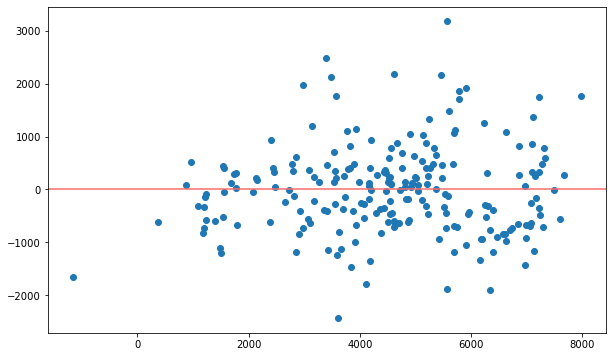

In [766]:
#Residual scatter plot
plt.figure(figsize=(10,6))
plt.scatter(y_pred_m18, y_pred_m18-y_test)
plt.axhline(0, color='#FA6C6C')
plt.show()

In [678]:
y_train_cnt = lr_18.predict(X_train_lm)

Text(0.5, 0, 'Errors')

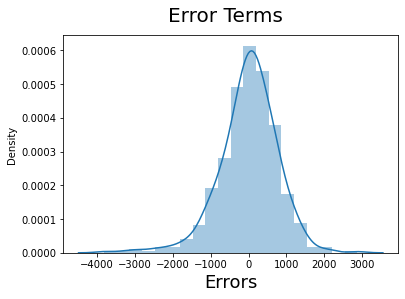

In [679]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

As we can see above Residuals are normally distrubuted hence proving out assumptions for Linear Regression

### Predictions using Final Model

#### Scaling

In [680]:
num_vars = ['season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2', 
        'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 
        'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 
        'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 
        'workingday_1', 'weathersit_2', 'weathersit_3']
bikeShare_test[num_vars] = scaler.transform(bikeShare_test[num_vars])

In [681]:
bikeShare_test.describe()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,20.815737,24.255828,61.961883,12.600130,4546.981735,0.264840,0.246575,0.232877,0.479452,0.100457,...,0.036530,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.698630,0.319635,0.027397
std,7.689600,8.299641,14.456669,4.984858,1898.633630,0.442259,0.432005,0.423633,0.500722,0.301297,...,0.188034,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.459904,0.467403,0.163612
min,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [682]:
y_test = bikeShare_test.pop('cnt')
X_test = bikeShare_test

In [683]:
X_test_m18 = sm.add_constant(X_test)

In [684]:
columns_toDrop = list(set(bikeSharing_cleaned.columns) - set(X.columns))
columns_toDrop.remove('cnt')

In [685]:
X_test_m18 = X_test_m18.drop(columns_toDrop, axis=1)

In [686]:
y_pred_m18 = lr_18.predict(X_test_m18)

### MODEL EVALUATION

Text(0, 0.5, 'y_pred')

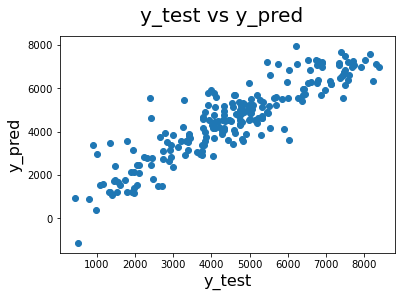

In [757]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m18)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

As we can see above `y_pred` and `y_test` are following linear pattern, confirming our assumptions

#### $R^{2}$ value for TEST

In [692]:
from sklearn.metrics import r2_score
r2_score_m18 = round(r2_score(y_test, y_pred_m17),3)
r2_score_m18

0.802

#### Adjusted $R^{2}$ value for TEST

In [720]:
n, p = X_test_m18.shape[0], X_test_m18.shape[1]

In [721]:
adjusted_r2_score_m18 = 1-(1-r2_score_m18)*(n-1)/(n-p-1)
round(adjusted_r2_score_m18,3)

0.789

### Conclusion

Train $R^2$ : 0.84

Adjusted $R^2$ : 0.84

---
Test $R^2$: 0.80

Adjusted Test $R^2$: 0.79

This seems to be a good model which can be generalized over various datasets
